## Semana de Data Science

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('carros_usados.xls')

In [3]:
df.head()

,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
0,TRAIN,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
1,TRAIN,6886,114,YES,72823,FAMILY.MEDIUM,Domestic,6,SIX,WHITE,DODGE,AZ,DODGE.NEON
2,TRAIN,3924,205,YES,96330,FAMILY.MEDIUM,Domestic,9,SEVEN+,WHITE,OLDSMOBILE,FL,OLDSMOBILE.CUTLASS SUPREME
3,TRAIN,4636,100,YES,58519,ECONOMY,Import,4,FOUR,GOLD,KIA,NV,KIA.SEPHIA
4,TRAIN,5080,129,YES,99057,FAMILY.MEDIUM,Domestic,4,FOUR,GREEN,OLDSMOBILE,NV,OLDSMOBILE.CUTLASS SUPREME


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7495 entries, 0 to 7494
Data columns (total 13 columns):
data.set             7495 non-null object
total.cost           7495 non-null int64
lot.sale.days        7495 non-null int64
overage              7495 non-null object
mileage              7495 non-null int64
vehicle.type         7495 non-null object
domestic.import      7495 non-null object
vehicle.age          7495 non-null int64
vehicle.age.group    7495 non-null object
color.set            7495 non-null object
makex                7495 non-null object
state                7495 non-null object
make.model           7495 non-null object
dtypes: int64(4), object(9)
memory usage: 761.3+ KB


In [5]:
df.describe()

,total.cost,lot.sale.days,mileage,vehicle.age
count,7495.000000,7495.000000,7495.000000,7495.000000
mean,4980.035490,76.454303,77234.533422,5.567312
std,937.602064,64.644337,17142.552588,1.756219
min,1375.000000,0.000000,1036.000000,1.000000
25%,4354.000000,14.000000,67946.000000,4.000000
50%,4919.000000,73.000000,78534.000000,5.000000
75%,5540.000000,120.000000,89340.000000,7.000000
max,9813.000000,300.000000,119250.000000,12.000000


In [6]:
df.isnull().sum()

data.set             0
total.cost           0
lot.sale.days        0
overage              0
mileage              0
vehicle.type         0
domestic.import      0
vehicle.age          0
vehicle.age.group    0
color.set            0
makex                0
state                0
make.model           0
dtype: int64

**Análise exploratória**

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [29]:
plt.rcParams['figure.figsize'] = (10,5)

**Definindo estilo**

In [8]:
plt.style.use('ggplot')

Text(0.5, 1.0, 'Distribuição da coluna total.cost')

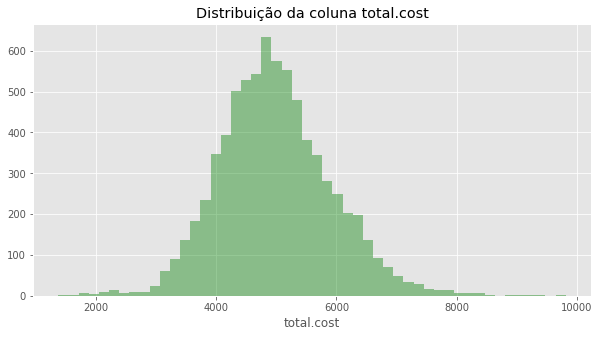

In [30]:
sns.distplot(df['total.cost'], color='green', kde=False)
plt.title('Distribuição da coluna total.cost')

**Qual a quantidade média de dias que os carros ficam na concessionária?**

Text(0.5, 1.0, 'Distribuição da coluna lot.sale.day')

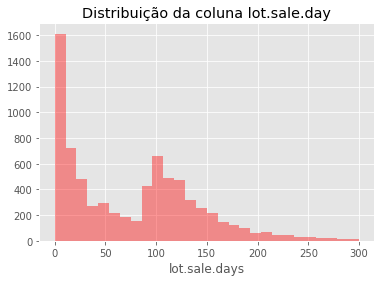

In [11]:
sns.distplot(df['lot.sale.days'], color='red', kde=False)
plt.title('Distribuição da coluna lot.sale.day')

**Qual a kilometragem média dos veículos da concessionária?**

Text(0.5, 1.0, 'Distribuição da coluna mileage')

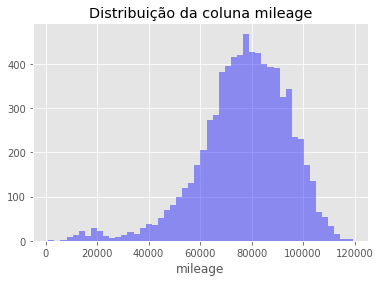

In [12]:
sns.distplot(df['mileage'], color='blue', kde=False)
plt.title('Distribuição da coluna mileage')

**Qual a idade média dos veículos da concessionária?**

Text(0.5, 1.0, 'Distribuição da coluna vehicle.age')

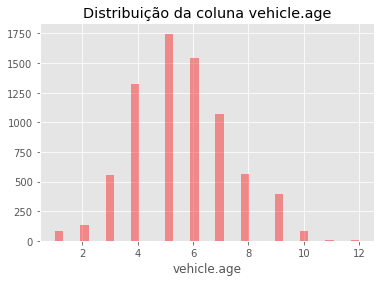

In [13]:
sns.distplot(df['vehicle.age'], color='red', kde=False)
plt.title('Distribuição da coluna vehicle.age')

**Visualizando a correlação entre algumas variáveis**

In [14]:
df[['mileage','vehicle.age','lot.sale.days','total.cost']].head()

,mileage,vehicle.age,lot.sale.days,total.cost
0,67341,8,135,4037
1,72823,6,114,6886
2,96330,9,205,3924
3,58519,4,100,4636
4,99057,4,129,5080


- **Calculando a correlação com o método corr()**

In [15]:
df[['mileage','vehicle.age','lot.sale.days','total.cost']].corr()

,mileage,vehicle.age,lot.sale.days,total.cost
mileage,1.000000,0.462838,0.060003,-0.127258
vehicle.age,0.462838,1.000000,0.186480,-0.309716
lot.sale.days,0.060003,0.186480,1.000000,0.167632
total.cost,-0.127258,-0.309716,0.167632,1.000000


In [16]:
correlacoes = df[['mileage','vehicle.age','lot.sale.days','total.cost']].corr()

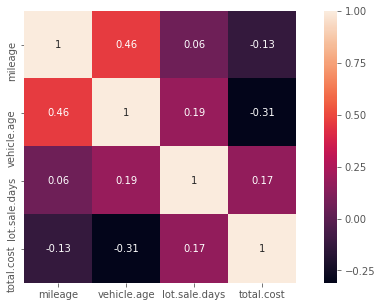

In [31]:
sns.heatmap(correlacoes, annot=True, square=True)
#sns.heatmap(correlacoes, annot=True, cmap='YlGnBu', square=True)

**Visualizando a disperssão entre os dias de vendas e algumas variáveis**

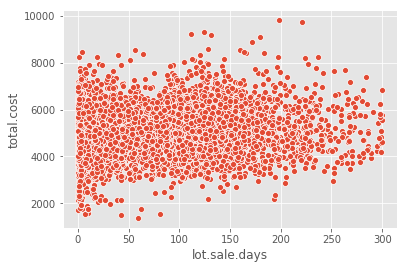

In [19]:
sns.scatterplot(x='lot.sale.days', y='total.cost', data=df)

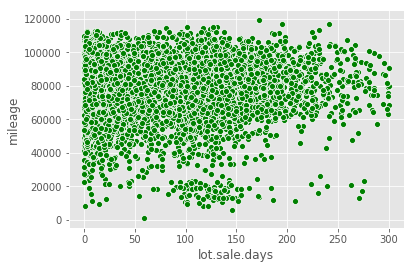

In [20]:
sns.scatterplot(x='lot.sale.days', y='mileage', data=df, color='green')

**Tempo médio de vendas por tipos de Veículos**

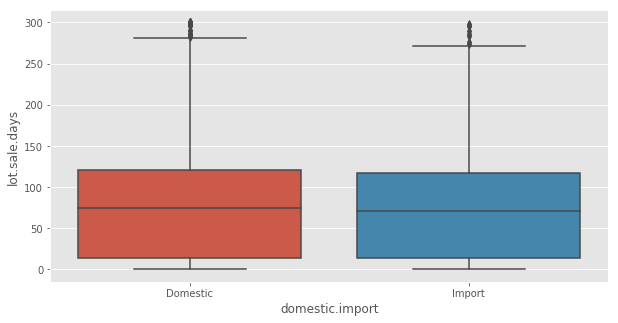

In [32]:
sns.boxplot(x='domestic.import', y='lot.sale.days', data=df)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

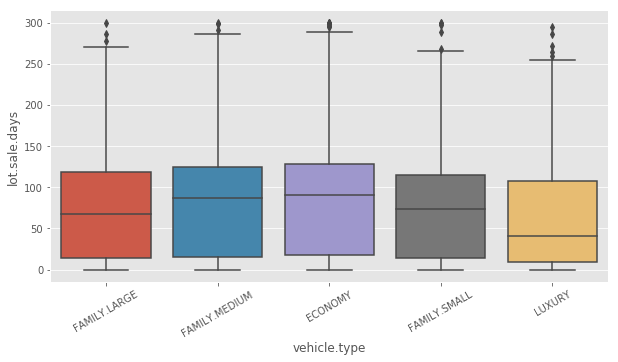

In [33]:
sns.boxplot(x='vehicle.type', y='lot.sale.days', data=df)
plt.xticks(rotation=30)

**Tempo médio de vendas por cor de veículos**

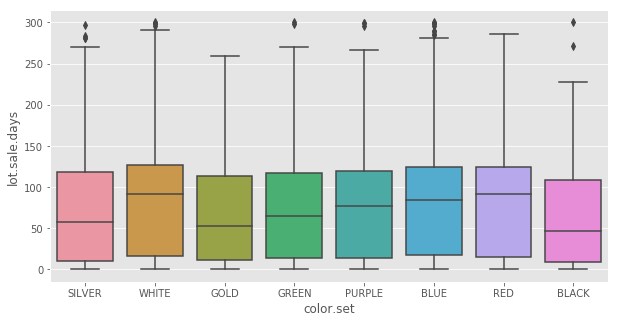

In [34]:
sns.boxplot(x='color.set', y='lot.sale.days', data=df)

**Tempo médio de vendas por marca dos veículos**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

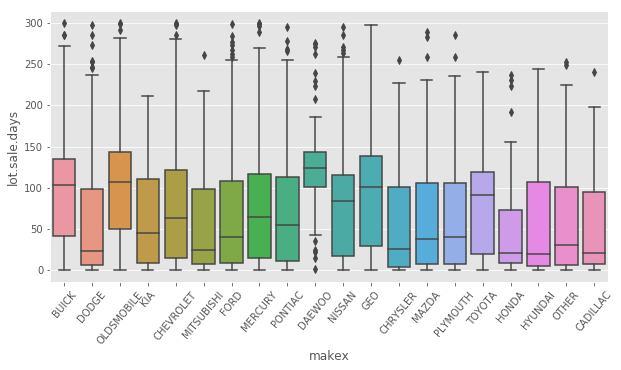

In [35]:
sns.boxplot(x='makex', y='lot.sale.days', data=df)
plt.xticks(rotation=50)

**Tempo médio de vendas por estado**

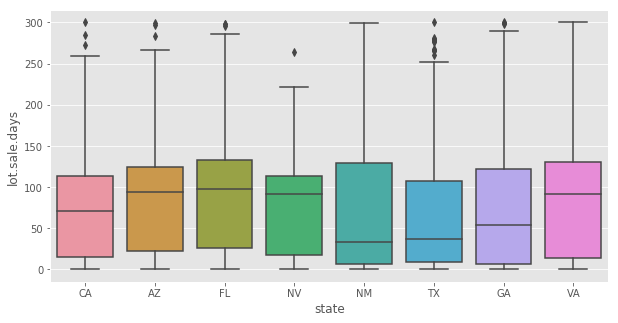

In [36]:
sns.boxplot(x='state', y='lot.sale.days', data=df)

**Construindo um Modelo de Machine Learning**

In [37]:
df.head(10)

,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
0,TRAIN,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
1,TRAIN,6886,114,YES,72823,FAMILY.MEDIUM,Domestic,6,SIX,WHITE,DODGE,AZ,DODGE.NEON
2,TRAIN,3924,205,YES,96330,FAMILY.MEDIUM,Domestic,9,SEVEN+,WHITE,OLDSMOBILE,FL,OLDSMOBILE.CUTLASS SUPREME
3,TRAIN,4636,100,YES,58519,ECONOMY,Import,4,FOUR,GOLD,KIA,NV,KIA.SEPHIA
4,TRAIN,5080,129,YES,99057,FAMILY.MEDIUM,Domestic,4,FOUR,GREEN,OLDSMOBILE,NV,OLDSMOBILE.CUTLASS SUPREME
5,TRAIN,4370,218,YES,82771,ECONOMY,Domestic,7,SEVEN+,WHITE,CHEVROLET,NM,CHEVROLET.CAVALIER
6,TRAIN,7578,128,YES,74255,FAMILY.MEDIUM,Import,5,FIVE,WHITE,MITSUBISHI,NV,MITSUBISHI.GALANT
7,TRAIN,5301,116,YES,82594,FAMILY.MEDIUM,Domestic,5,FIVE,PURPLE,OLDSMOBILE,AZ,OLDSMOBILE.CIERA
8,TRAIN,5531,100,YES,81167,FAMILY.LARGE,Domestic,5,FIVE,WHITE,FORD,FL,FORD.CROWN VICTORIA
9,TRAIN,5728,166,YES,80519,FAMILY.MEDIUM,Domestic,7,SEVEN+,SILVER,MERCURY,TX,MERCURY.SABLE


**Removendo a coluna vehicle.age.group e data.set**

In [38]:
df.drop(['vehicle.age.group','data.set'], axis=1, inplace=True)

**Aplicando LabelEncoder para codificação de variáveis categóricas**<br>
- Transforma as variáveis em números para aplicar ao modelo

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()
label_encoder4 = LabelEncoder()
label_encoder5 = LabelEncoder()
label_encoder6 = LabelEncoder()

**Aplica o LabelEncoder nos dados categóricos**

In [41]:
df['vehicle.type'] = label_encoder1.fit_transform(df['vehicle.type'])
df['domestic.import'] = label_encoder2.fit_transform(df['domestic.import'])
df['color.set'] = label_encoder3.fit_transform(df['color.set'])
df['makex'] = label_encoder4.fit_transform(df['makex'])
df['state'] = label_encoder5.fit_transform(df['state'])
df['make.model'] = label_encoder6.fit_transform(df['make.model'])

**Dados transformados**<br>
Única tabela categórica que temos é a `overage`, ela será nossa classe para treinarmos o modelo

In [42]:
df.head(10)

,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
0,4037,135,YES,67341,1,0,8,6,0,1,1
1,6886,114,YES,72823,2,0,6,7,5,0,33
2,3924,205,YES,96330,2,0,9,7,15,2,77
3,4636,100,YES,58519,0,1,4,2,10,5,54
4,5080,129,YES,99057,2,0,4,3,15,5,77
5,4370,218,YES,82771,0,0,7,7,2,4,14
6,7578,128,YES,74255,2,1,5,7,13,5,65
7,5301,116,YES,82594,2,0,5,4,15,0,75
8,5531,100,YES,81167,1,0,5,7,6,2,38
9,5728,166,YES,80519,2,0,7,6,12,6,61


**Separando a `classe` dos dados**

In [43]:
# É comumente utilizado o 'y' como variável no momento em que separamos a nossa classe
y = df['overage']

In [44]:
y.head()

0    YES
1    YES
2    YES
3    YES
4    YES
Name: overage, dtype: object

**Apaga a coluna overage e a coluna lot.sale.days** <br>
- Removemos a lot.days.sales pois ela já contém os dias, com isso não estariamos treinando corretamente nosso modelo

In [45]:
X = df.drop(['lot.sale.days','overage'], axis=1)

***Agora temos o*** `'y'` ***como nossa classe e o*** `'X'` ***com os nossos dados sem a classe***

O 'X' `(características - features)` vamos passar para nosso algoritmo aprender e o 'y' são nossas respostas***

In [46]:
X.head()

,total.cost,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
0,4037,67341,1,0,8,6,0,1,1
1,6886,72823,2,0,6,7,5,0,33
2,3924,96330,2,0,9,7,15,2,77
3,4636,58519,0,1,4,2,10,5,54
4,5080,99057,2,0,4,3,15,5,77


**Separando os dados de treino e teste** <br>
Vamos separar em 75% / 25%

In [47]:
from sklearn.model_selection import train_test_split

Utilizamos a forma abaixo para inserirmos os dados nas variáveis, que são:<br>
- **X_treino** -> Pega os dados para treino `sem as classes`;
- **X_teste** -> Pega os dados para teste, são aqueles dados que o algoritmo `não conhece` e vai usar para testar;
- **y_treino** > Refere-se a classe dos meus dados de treino, ou seja, as respostas dos dados de treino
- **y_teste** -> É a classe dos testes, quando enviar os dados para testar o algoritmo, precisamos das `respostas reais` para saber se o algoritmo acertou ou errou. <br><br>
Tanto o treino quanto as respostas iremos informar ao algoritmo para que ele aprenda a classificar novos exemplos

In [48]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y)

In [49]:
# Contando meus dados de treino
X_treino.count()

total.cost         5621
mileage            5621
vehicle.type       5621
domestic.import    5621
vehicle.age        5621
color.set          5621
makex              5621
state              5621
make.model         5621
dtype: int64

In [51]:
# Contando minha classe de teste
y_treino.count()

5621

In [52]:
X_teste.count()

total.cost         1874
mileage            1874
vehicle.type       1874
domestic.import    1874
vehicle.age        1874
color.set          1874
makex              1874
state              1874
make.model         1874
dtype: int64

In [54]:
y_teste.count()

1874

**Aplicando Machine Learning com Árvore de Decisão**

In [55]:
from sklearn import tree

In [56]:
arvore = tree.DecisionTreeClassifier()

In [57]:
arvore.fit(X_treino, y_treino)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Validação do modelo** <br>
Passamos nossos dados de teste para o modelo fazer a previsão

In [58]:
X_teste.head()

,total.cost,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
5420,6801,98322,4,1,6,5,19,1,92
69,5867,97043,1,0,5,3,3,0,25
179,5919,108248,3,1,7,6,19,0,93
1436,5429,88439,2,0,6,7,15,3,77
2215,7096,95076,2,0,6,3,0,6,4


In [59]:
arvore.predict(X_teste)

array(['NO', 'NO', 'YES', ..., 'YES', 'YES', 'NO'], dtype=object)

In [60]:
resultado = arvore.predict(X_teste)

In [61]:
resultado

array(['NO', 'NO', 'YES', ..., 'YES', 'YES', 'NO'], dtype=object)

**Após passar os dados para o algoritmo, vamos fazer a métrica e identificar como está os acertos e erros**

In [62]:
from sklearn import metrics
print(metrics.classification_report(y_teste,resultado)) # Resultados reais, classificações realizadas

              precision    recall  f1-score   support

          NO       0.66      0.64      0.65      1022
         YES       0.59      0.61      0.60       852

   micro avg       0.63      0.63      0.63      1874
   macro avg       0.63      0.63      0.63      1874
weighted avg       0.63      0.63      0.63      1874



`**Conclusões**`:
- Tivemos uma precisão de 63% para classificar carros que superam os 90 dias.
- O modelo pode melhorar se trabalhar mais nos dados, e com um trabalho de engenharia de features

**Features mais importantes para o modelo**

In [63]:
arvore.feature_importances_

array([0.27180676, 0.22061771, 0.06399968, 0.00974366, 0.08669935,
       0.0933179 , 0.04458733, 0.07856502, 0.13066259])

In [64]:
feature_imp = pd.Series(arvore.feature_importances_,index=X_treino.columns)

In [65]:
feature_imp

total.cost         0.271807
mileage            0.220618
vehicle.type       0.064000
domestic.import    0.009744
vehicle.age        0.086699
color.set          0.093318
makex              0.044587
state              0.078565
make.model         0.130663
dtype: float64

**Visualizando as Features mais importantes do modelo**

Text(0.5, 1.0, 'Importânica de Features')

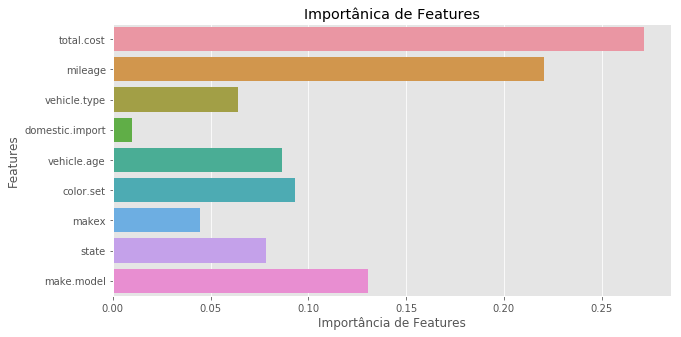

In [66]:
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Importância de Features')
plt.ylabel('Features')
plt.title('Importânica de Features')

### Visualizando a árvode de Decisão

- Instala as bibliotecas para visualização no Jupyter notebook

In [67]:
!pip install pydot
!pip install graphviz

In [68]:
import pydot
import graphviz
from ipywidgets import interactive

In [83]:
import os
os.environ["PATH"] += os.pathsep + 'E:\\Anaconda3\\Library\\bin\\graphviz'

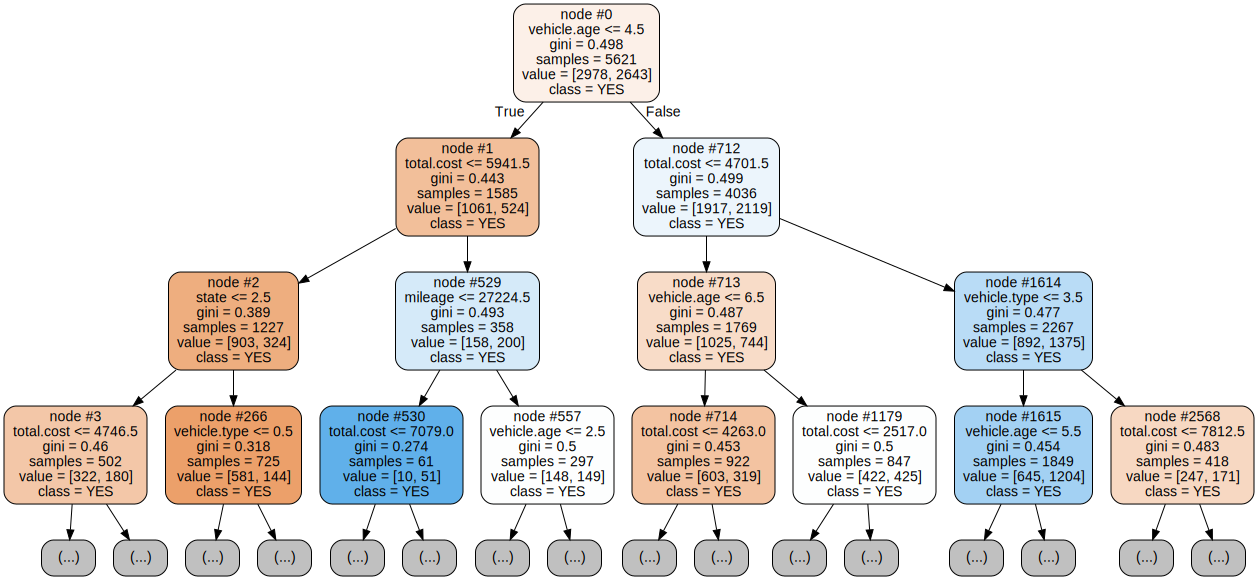

In [84]:
dot_data = tree.export_graphviz(
    arvore,
    feature_names=X.columns,
    class_names=y, # Mostra a classificação
    max_depth=3, # nível máximo de 3 ramos 
    filled=True, # Colorindo a arvore
    rounded=True, # Caixas arredondadas
    node_ids=True, # Mostra o número dos nodes
    label='all',
)
graph = graphviz.Source(dot_data)
graph

`**Conclusão**`:
- *O nó que melhor separa os dados é o nó vehicle.age, em seguida o nó total.cost e mileage*